In [1]:
import json
import os
import collections
import pandas as pd
from altair import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
files = os.listdir('user_data/')
covered = set()
count = 0
r1, r2, r3 = [], [], []
for name in files:
    if '.json' not in name: continue
    # print(name)
    count += 1
    with open('user_data/' + name, 'r') as f:
        d = json.load(f)
        for item in d:
            if 'rank_result' in item:
                covered.add(item['rank_result'][0].split('/')[1].split('_')[0])
                t = [i.split('/')[0] for i in item['rank_result']]
                r1.append(t[0])
                r2.append(t[1])
                r3.append(t[2])
print('number of subjects:', count)
print('number of covered images:', len(covered))
print('coverage rate:', len(covered) / 3000)

number of subjects: 26
number of covered images: 1794
coverage rate: 0.598


In [4]:
r1 = collections.Counter(r1)
r2 = collections.Counter(r2)
r3 = collections.Counter(r3)

In [5]:
total = sum(r1[k] for k in r1)

In [120]:
plot_data = []
for k in dict(r1):
    plot_data.append({
        'rank': '1st',
        'Method': k.upper(),
        'count': dict(r1)[k]
    })

for k in dict(r2):
    plot_data.append({
        'rank': '2nd',
        'Method': k.upper(),
        'count': dict(r2)[k]
    })

for k in dict(r3):
    plot_data.append({
        'rank': '3rd',
        'Method': k.upper(),
        'count': dict(r3)[k]
    })

In [121]:
df = pd.DataFrame(plot_data)
df['percentage'] = df['count'].apply(lambda x: x / total)

In [143]:
df['formatted_percentage'] = pd.Series(["{0:.01%}".format(val) for val in df['percentage']], index = df.index)

In [150]:
df['method_order'] = [0 if m=='OURS' else 1 if m=='CE' else 2 for m in df['method']]

In [151]:
df

,count,method,rank,percentage,formatted_percentage,method_order
0,2158,OURS,1st,0.830000,83.0%,0
1,208,GL,1st,0.080000,8.0%,2
2,234,CE,1st,0.090000,9.0%,1
3,1361,CE,2nd,0.523462,52.3%,1
4,936,GL,2nd,0.360000,36.0%,2
5,303,OURS,2nd,0.116538,11.7%,0
6,1456,GL,3rd,0.560000,56.0%,2
7,1005,CE,3rd,0.386538,38.7%,1
8,139,OURS,3rd,0.053462,5.3%,0


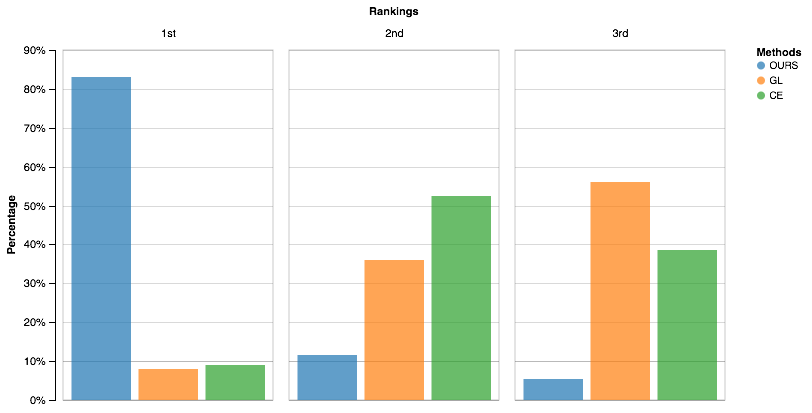

In [152]:
Chart(df, width=210).mark_bar().encode(
    color=Color('method:N', 
                scale=Scale(domain=[s.upper() for s in list(r1.keys())]), 
                legend=Legend(title='Methods')),
    column=Column('rank:N', title='Rankings'),
    x=X('method:N',
        sort='descending',
        scale=Scale(bandSize=17.0),
        axis=False),
    y=Y('percentage:Q',
       axis=Axis(title='Percentage', format='.00%')),
    label=Label(field='percentage')
)

In [90]:
import seaborn as sns
from matplotlib.pyplot import show

In [83]:
sns.set(style="whitegrid")

(0, 1)

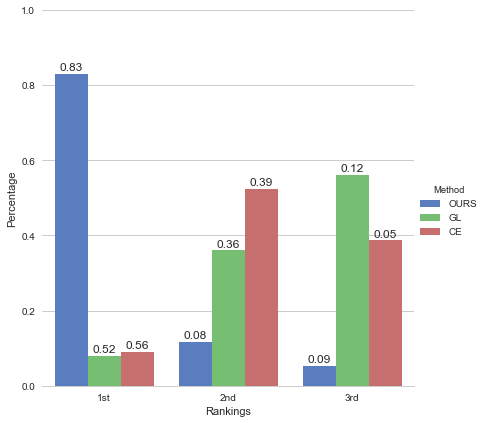

In [127]:
g = sns.factorplot(data=df, x='rank', y='percentage', hue='Method', \
              size=6, kind='bar', palette='muted')
for i,p in enumerate(g.axes[0][0].patches):
    height = p.get_height()
    g.axes[0][0].text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(df['percentage'][i]),
            ha="center") 
g.despine(left=True)
g.set_xlabels('Rankings')
g.set_ylabels('Percentage')
plt.ylim(0,1)

In [ ]:
g.savefig